### Import Libraries

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
heartrate_df = pd.read_csv('heartrate_seconds_merged.csv')
weight_df = pd.read_csv('weightLogInfo_merged.csv')

In [29]:
heartrate_df.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [8]:
weight_df.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [17]:
heartrate_df.isnull().sum()

Id       0
Time     0
Value    0
dtype: int64

In [ ]:
weight_df.isnull().sum()

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

In [9]:
weight_df = weight_df.drop('Fat', axis = 1)

In [10]:
weight_df.isnull().sum()


Id                0
Date              0
WeightKg          0
WeightPounds      0
BMI               0
IsManualReport    0
LogId             0
dtype: int64

In [13]:
weight_df['Date'] = pd.to_datetime(weight_df['Date'])
weight_df.head()

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.650000,True,1462233599000
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,22.650000,True,1462319999000
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,47.540001,False,1460509732000
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,21.450001,True,1461283199000
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,21.690001,True,1463097599000


In [14]:
weight_df.to_csv('weightLogInfo_merged.csv', index= False)

In [10]:
heartrate_df['Id'].value_counts()

Id
4020332650    285461
6962181067    266326
5553957443    255174
4388161847    249748
5577150313    248560
8877689391    228841
4558609924    192168
6117666160    158899
2022484408    154104
2347167796    152683
7007744171    133592
8792009665    122841
6775888955     32771
2026352035      2490
Name: count, dtype: int64

In [11]:
weight_df['Id'].value_counts()


Id
6962181067    30
8877689391    24
4558609924     5
1503960366     2
2873212765     2
4319703577     2
1927972279     1
5577150313     1
Name: count, dtype: int64

In [24]:
heartrate_df['Time'] = pd.to_datetime(heartrate_df['Time'])
user_df = heartrate_df[heartrate_df['Id']== 6117666160]
user_df = user_df.sort_values('Time')


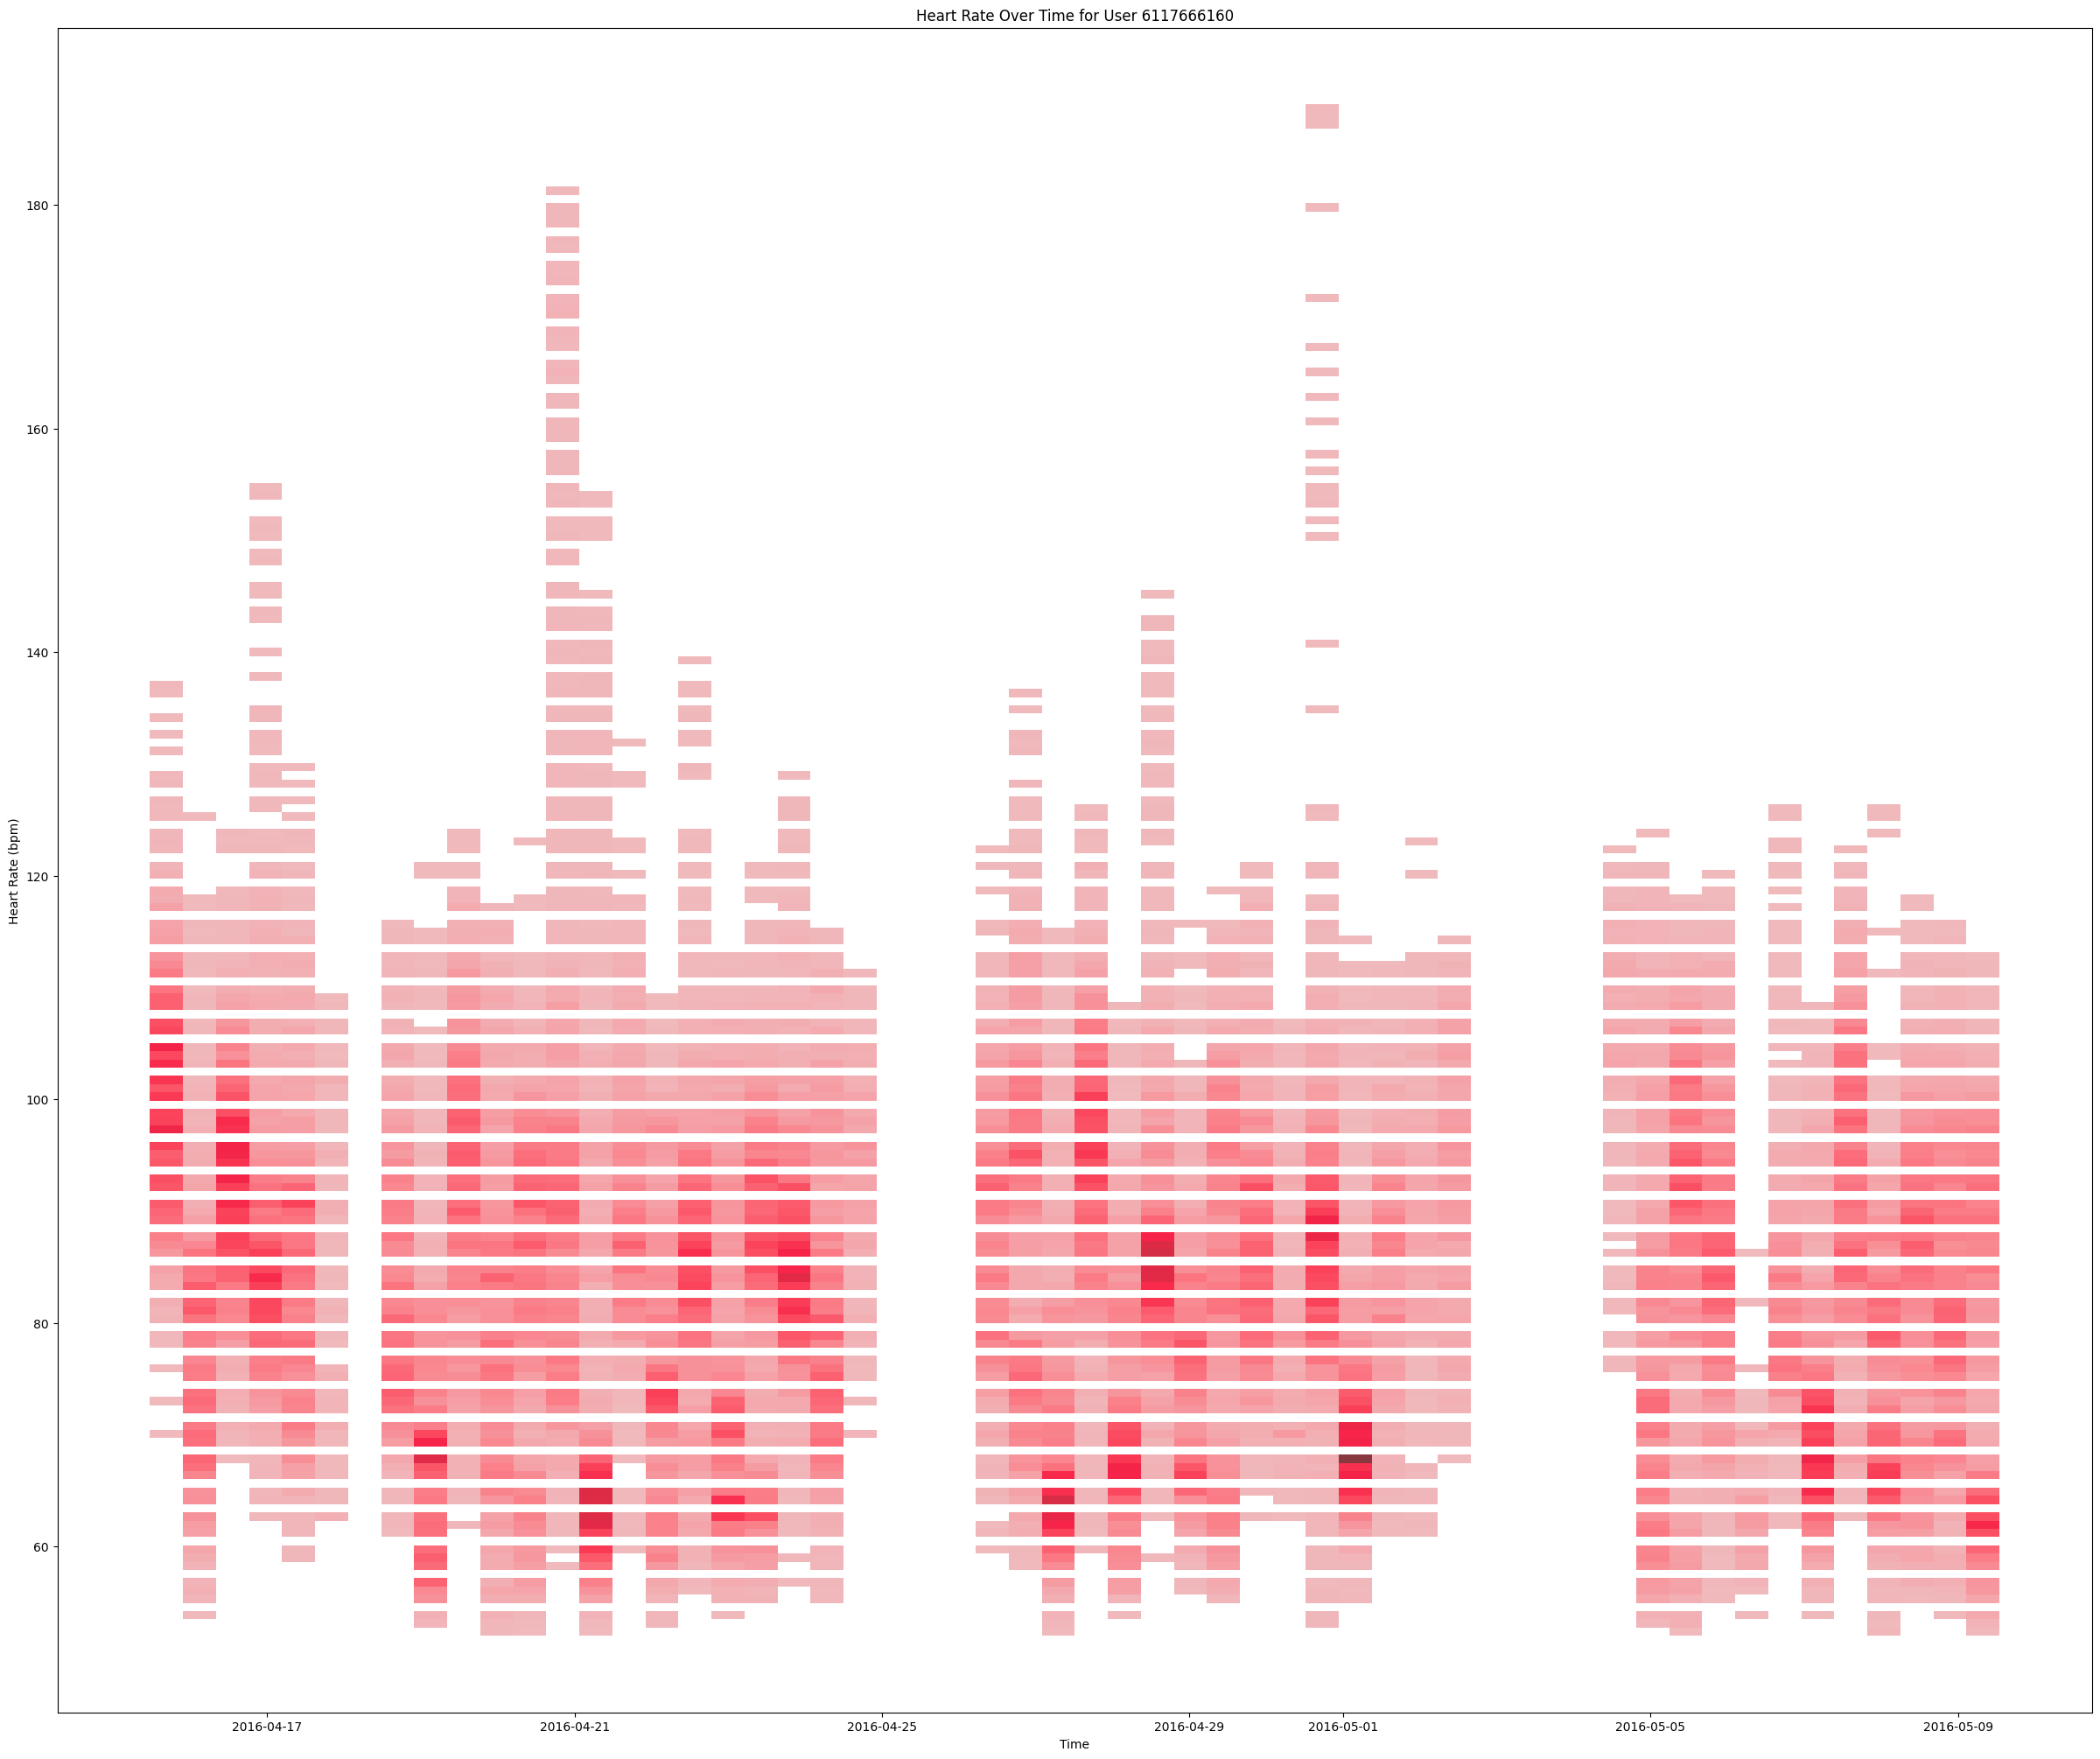

In [29]:
plt.figure(figsize=(30, 25))
sns.histplot(data=user_df, x='Time', y='Value',multiple="stack", color='crimson')
plt.title('Heart Rate Over Time for User 6117666160')
plt.xlabel('Time')
plt.ylabel('Heart Rate (bpm)')

plt.show()

<Axes: xlabel='BMI', ylabel='WeightKg'>

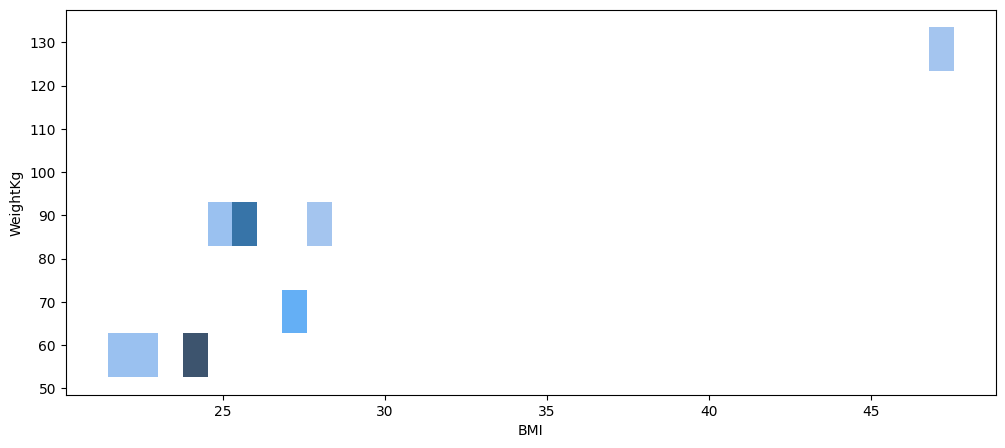

In [41]:
plt.figure(figsize=(12, 5))
sns.histplot(data=weight_df, x='BMI', y='WeightKg')

<Axes: xlabel='BMI', ylabel='WeightKg'>

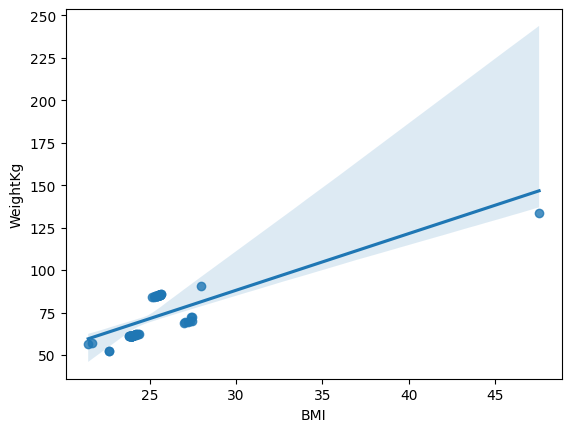

In [43]:
sns.regplot(data=weight_df, x='BMI', y='WeightKg')

In [44]:
sleep_df = pd.read_csv('sleepDay_merged.csv')

In [49]:
sleep_df.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [50]:
sleep_df['SleepDay'] = pd.to_datetime(sleep_df['SleepDay'])

In [53]:
sleep_df.to_csv('sleepDay_merged.csv', index=False)

In [54]:
dailySteps_df = pd.read_csv('dailySteps_merged.csv')

In [56]:
dailySteps_df.head()


,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [65]:
dailySteps_df.describe()

,Id,ActivityDay,StepTotal
count,9.400000e+02,940,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638
min,1.503960e+09,2016-04-12 00:00:00,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000
std,2.424805e+09,NaN,5087.150742


In [64]:
dailySteps_df['ActivityDay'] = pd.to_datetime(dailySteps_df['ActivityDay'])
dailySteps_df.head()


,Id,ActivityDay,StepTotal
0,1503960366,2016-04-12,13162
1,1503960366,2016-04-13,10735
2,1503960366,2016-04-14,10460
3,1503960366,2016-04-15,9762
4,1503960366,2016-04-16,12669


In [63]:
dailySteps_df.to_csv('dailySteps_merged.csv', index=False)

In [4]:
calories_df = pd.read_csv('dailyCalories_merged.csv')
calories_df.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [5]:
calories_df['ActivityDay'] = pd.to_datetime(calories_df['ActivityDay'])
calories_df.head()

,Id,ActivityDay,Calories
0,1503960366,2016-04-12,1985
1,1503960366,2016-04-13,1797
2,1503960366,2016-04-14,1776
3,1503960366,2016-04-15,1745
4,1503960366,2016-04-16,1863


In [6]:
calories_df.to_csv('dailyCalories_merged.csv', index=False)

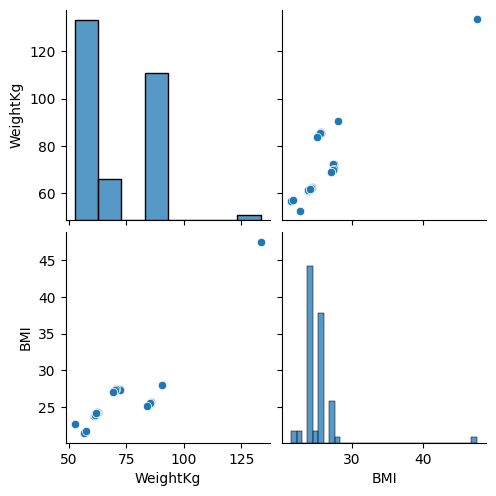

In [38]:
sns.pairplot(weight_df[['WeightKg', 'BMI']])
plt.show()

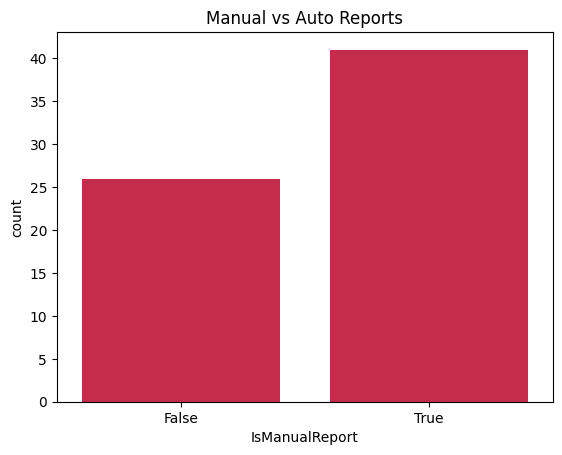

In [43]:
sns.countplot(data=weight_df, x='IsManualReport', color = 'crimson')
plt.title('Manual vs Auto Reports')
plt.show()

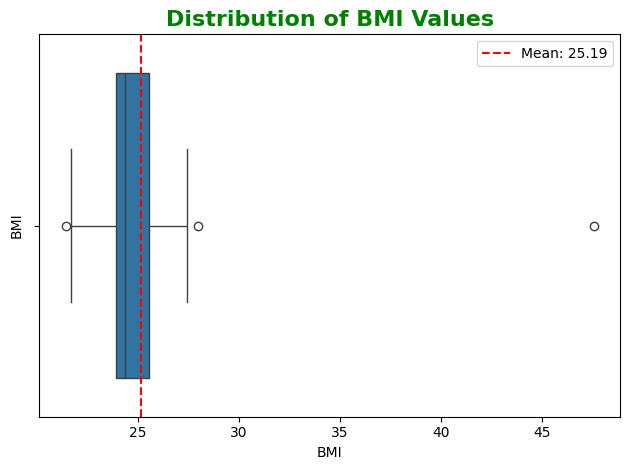

In [59]:
sns.boxplot(x = weight_df['BMI'])

plt.title('Distribution of BMI Values', fontsize=16, fontweight='bold', color='green')
plt.ylabel('BMI')
mean_bmi = weight_df['BMI'].mean()
plt.axvline(mean_bmi, color='red', linestyle='--', label=f'Mean: {mean_bmi:.2f}')
plt.legend()

plt.tight_layout()
plt.show()


In [3]:
hourly_steps_df = pd.read_csv('hourlySteps_merged.csv')

In [39]:
hourly_steps_df.head()

,Id,ActivityHour,StepTotal,ActivityDate
0,1503960366,2016-04-12 00:00:00,373,2016-04-12
1,1503960366,2016-04-12 01:00:00,160,2016-04-12
2,1503960366,2016-04-12 02:00:00,151,2016-04-12
3,1503960366,2016-04-12 03:00:00,0,2016-04-12
4,1503960366,2016-04-12 04:00:00,0,2016-04-12


In [69]:
hourly_steps_df ['ActivityHour'] = pd.to_datetime(hourly_steps_df['ActivityHour'])

In [51]:
hourly_steps_df['ActivityDate'] = hourly_steps_df['ActivityHour'].dt.date

In [35]:
target_day = pd.to_datetime('2016-04-12').date()
df_day = hourly_steps_df[hourly_steps_df['ActivityDate'] == target_day]

In [71]:
selected_ids = df_day['Id'].unique()[:3]  # or manually: [1503960366, 1927972279, 6962181067]
df_day = df_day[df_day['Id'].isin(selected_ids)]

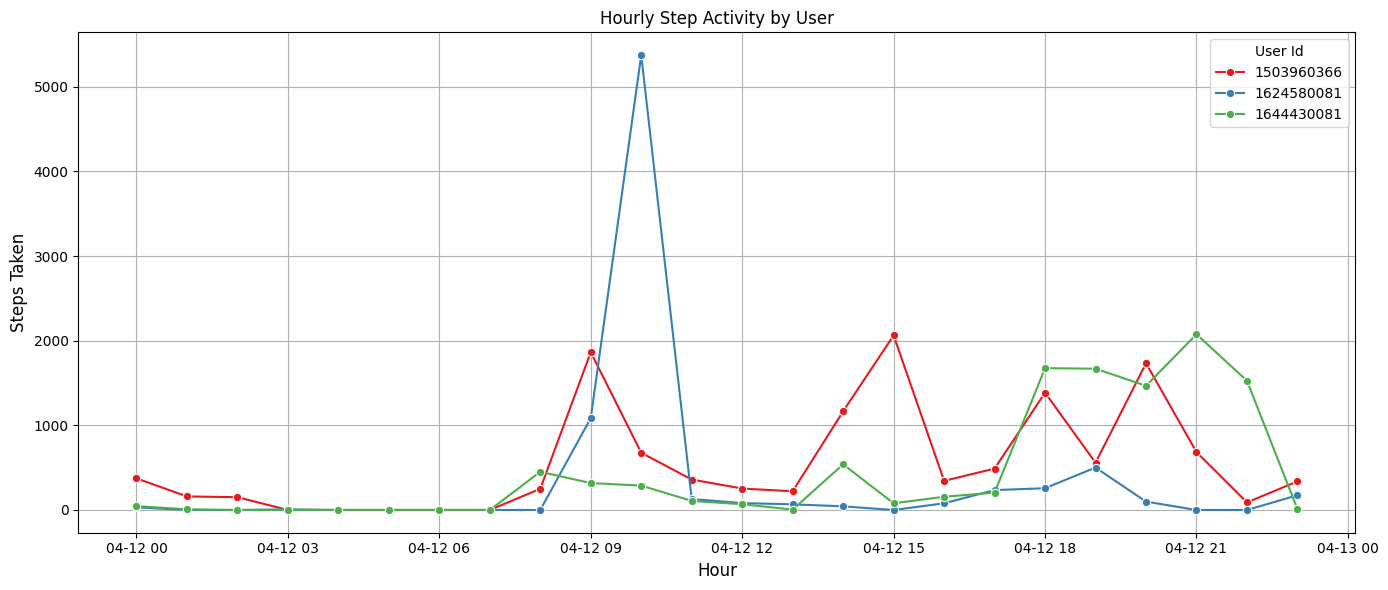

In [72]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_day, x='ActivityHour', y='StepTotal', hue='Id', marker = 'o', palette='Set1')

plt.title('Hourly Step Activity by User')
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Steps Taken', fontsize=12)
plt.grid(True)
plt.legend(title='User Id')
plt.tight_layout()
plt.show()

In [53]:
hourly_calories_df = pd.read_csv('hourlyCalories_merged.csv')

In [54]:
hourly_calories_df.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [55]:
hourly_calories_df['ActivityHour'] = pd.to_datetime(hourly_calories_df['ActivityHour'])
hourly_calories_df.head()

C:\Users\KHUSHI\AppData\Local\Temp\ipykernel_9564\3175346485.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_calories_df['ActivityHour'] = pd.to_datetime(hourly_calories_df['ActivityHour'])


,Id,ActivityHour,Calories
0,1503960366,2016-04-12 00:00:00,81
1,1503960366,2016-04-12 01:00:00,61
2,1503960366,2016-04-12 02:00:00,59
3,1503960366,2016-04-12 03:00:00,47
4,1503960366,2016-04-12 04:00:00,48


In [65]:
hourly_calories_df['ActivityDate'] = hourly_calories_df['ActivityHour'].dt.date

In [67]:

target_day2 = pd.to_datetime('2016-04-17').date()
df_day2 = hourly_calories_df[hourly_calories_df['ActivityDate'] == target_day2]

In [74]:
selected_ids = df_day2['Id'].unique()[:3]  # or manually: [1503960366, 1927972279, 6962181067]
df_day2 = df_day2[df_day2['Id'].isin(selected_ids)]

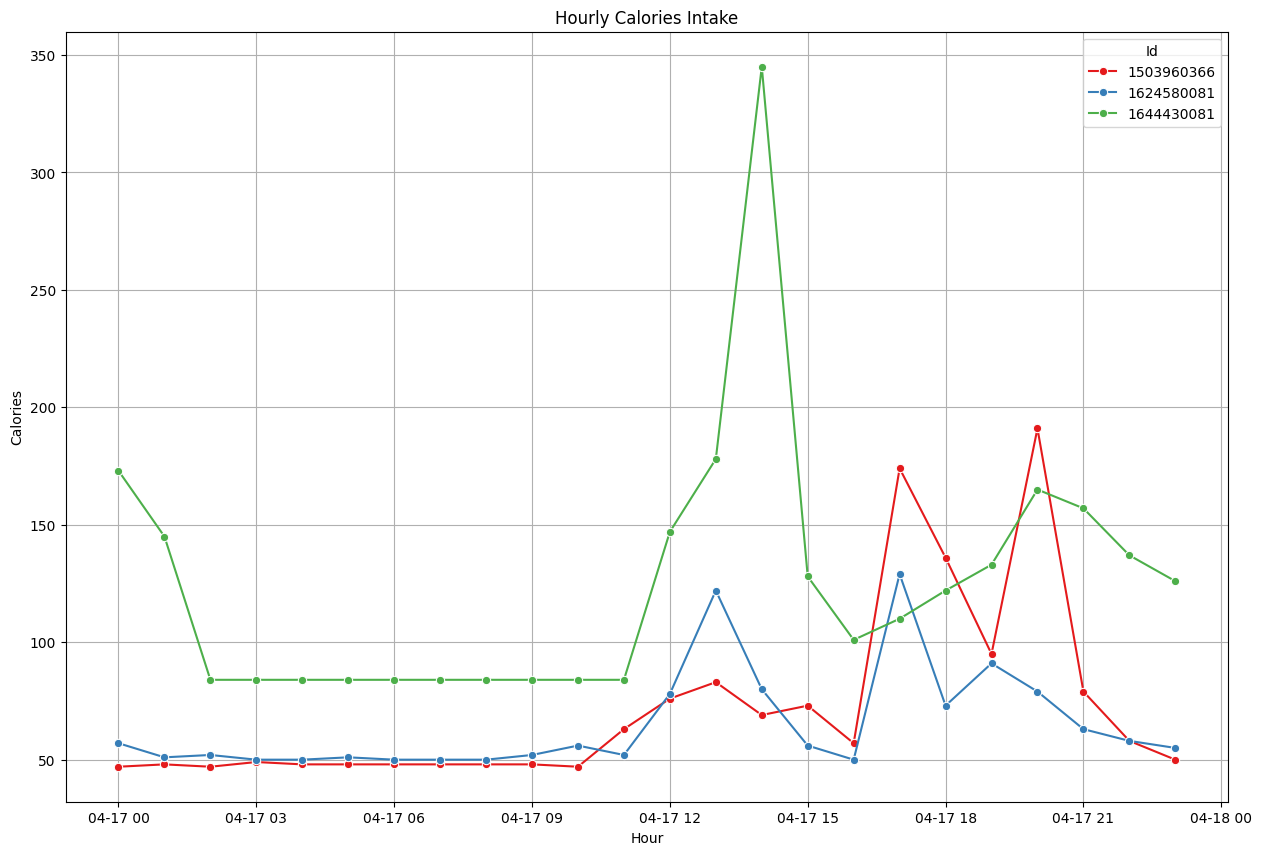

In [80]:
plt.figure(figsize = (15,10))
sns.lineplot(data = df_day2, x ='ActivityHour', y ='Calories', hue = 'Id', marker = 'o', palette='Set1')
plt.title('Hourly Calories Intake')
plt.xlabel('Hour')
plt.ylabel('Calories')
plt.grid('True')
plt.show()

In [2]:
minuteMet_df = pd.read_csv('minuteMETsNarrow_merged.csv')

In [9]:
minuteMet_df.head()

,Id,ActivityMinute,METs
0,1503960366,2016-04-12 00:00:00,10
1,1503960366,2016-04-12 00:01:00,10
2,1503960366,2016-04-12 00:02:00,10
3,1503960366,2016-04-12 00:03:00,10
4,1503960366,2016-04-12 00:04:00,10


In [7]:
minuteMet_df['ActivityMinute'] = pd.to_datetime(minuteMet_df['ActivityMinute'])

In [15]:
minuteMet_df['ActivityDate'] = minuteMet_df['ActivityMinute'].dt.date

In [17]:
target_day3 = pd.to_datetime('2016-04-12').date()
df_day3 = minuteMet_df[minuteMet_df['ActivityDate'] == target_day3]

In [25]:
selected_ids = df_day3['Id'].unique()[:1]  # or manually: [1503960366, 1927972279, 6962181067]
df_day3 = df_day3[df_day3['Id'].isin(selected_ids)]

In [40]:

fig = px.area(
    df_day3,
    x='ActivityMinute',
    y='METs',
    color='Id',
    markers=True,
    title='M etabolic E quivalent of T ask',
    labels={'ActivityMinute': 'Time', 'Mets': 'METs Unit', 'Id': 'User ID'}
)

fig.update_layout(
    xaxis_title='Minute',
    yaxis_title='METs rate',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()